In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [8]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.2, 42),
    get_y=parent_label
    ).dataloaders(path/'training', bs=32)

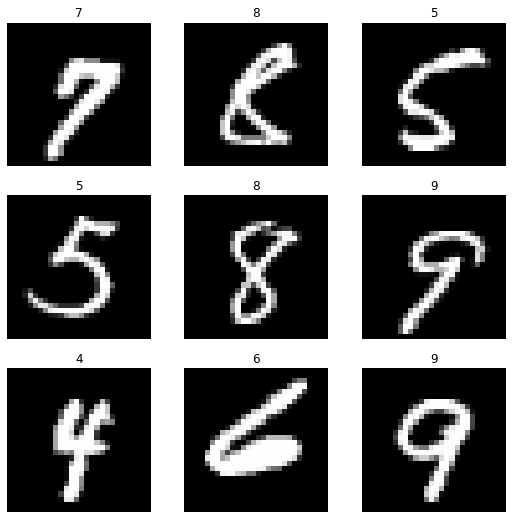

In [9]:
dls.show_batch()

In [10]:
learner = vision_learner(dls, resnet18, metrics=accuracy)
learner.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.743005,0.489318,0.845000,07:01


epoch,train_loss,valid_loss,accuracy,time
0,0.163508,0.071255,0.979833,14:44
1,0.075835,0.038120,0.989333,14:58
2,0.039404,0.029524,0.990917,15:41


In [ ]:
learner = vision_learner(dls, resnet34, metrics=accuracy)
learner.fine_tune(3)

In [11]:
learner.export('model.pki')

In [17]:
dls_test = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    #splitter=RandomSplitter(0.2, 42),
    get_y=parent_label
    ).dataloaders(path/'testing', bs=32)

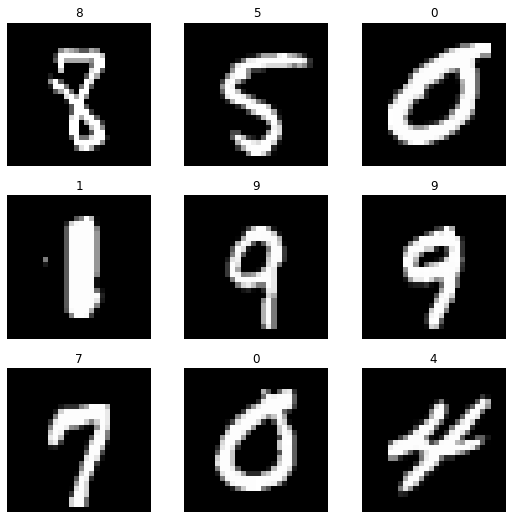

In [18]:
dls_test.show_batch()

In [19]:
#preds, y = learner.get_preds(dl=dls_test)
#accuracy(preds, y)

learner.validate()[1]

0.9909166693687439